This analysis explores traffic density patterns in a futuristic urban setting by examining a variety of influencing factors. These include the type of city, prevailing weather conditions, economic states, and the use of advanced vehicles such as flying cars and drones. The study also incorporates energy consumption, hour of day, and vehicle speed as continuous predictors.

Through multiple linear regression, we evaluate how each of these variables contributes to traffic congestion, aiming to understand which conditions lead to higher or lower traffic density in future smart cities.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('futuristic_city_traffic.csv')

In [5]:
df.head(5)

,City,Vehicle Type,Weather,Economic Condition,Day Of Week,Hour Of Day,Speed,Is Peak Hour,Random Event Occurred,Energy Consumption,Traffic Density
0,SolarisVille,Drone,Snowy,Stable,Sunday,20,29.4268,0,0,14.7134,0.5241
1,AquaCity,Flying Car,Solar Flare,Recession,Wednesday,2,118.8000,0,0,143.5682,0.3208
2,Neuroburg,Autonomous Vehicle,Solar Flare,Recession,Wednesday,16,100.3904,0,0,91.2640,0.0415
3,Ecoopolis,Drone,Clear,Booming,Thursday,8,76.8000,1,0,46.0753,0.1811
4,AquaCity,Autonomous Vehicle,Solar Flare,Stable,Saturday,16,45.2176,0,0,40.1934,0.4544


In [7]:
df['Random Event Occurred'].value_counts()

Random Event Occurred
0    1158726
1      60841
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1219567 entries, 0 to 1219566
Data columns (total 11 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   City                   1219567 non-null  object 
 1   Vehicle Type           1219567 non-null  object 
 2   Weather                1219567 non-null  object 
 3   Economic Condition     1219567 non-null  object 
 4   Day Of Week            1219567 non-null  object 
 5   Hour Of Day            1219567 non-null  int64  
 6   Speed                  1219567 non-null  float64
 7   Is Peak Hour           1219567 non-null  int64  
 8   Random Event Occurred  1219567 non-null  int64  
 9   Energy Consumption     1219567 non-null  float64
 10  Traffic Density        1219567 non-null  float64
dtypes: float64(3), int64(3), object(5)
memory usage: 102.4+ MB


In [11]:
df.isnull().sum()

City                     0
Vehicle Type             0
Weather                  0
Economic Condition       0
Day Of Week              0
Hour Of Day              0
Speed                    0
Is Peak Hour             0
Random Event Occurred    0
Energy Consumption       0
Traffic Density          0
dtype: int64

In [13]:
df.duplicated().sum()

0

Number of unique value in object data type columns for dummy variable

In [16]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(i, '=',df[i].nunique(), df[i].unique())
        print('\n')

City = 6 ['SolarisVille' 'AquaCity' 'Neuroburg' 'Ecoopolis' 'TechHaven'
 'MetropolisX']


Vehicle Type = 4 ['Drone' 'Flying Car' 'Autonomous Vehicle' 'Car']


Weather = 5 ['Snowy' 'Solar Flare' 'Clear' 'Rainy' 'Electromagnetic Storm']


Economic Condition = 3 ['Stable' 'Recession' 'Booming']


Day Of Week = 7 ['Sunday' 'Wednesday' 'Thursday' 'Saturday' 'Monday' 'Friday' 'Tuesday']




In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Hour Of Day,1219567.0,11.508175,6.919071,0.0000,6.00000,12.0000,17.00000,23.0000
Speed,1219567.0,59.944759,26.632028,6.6934,37.53310,58.4711,80.53455,163.0886
Is Peak Hour,1219567.0,0.154699,0.361618,0.0000,0.00000,0.0000,0.00000,1.0000
Random Event Occurred,1219567.0,0.049887,0.217712,0.0000,0.00000,0.0000,0.00000,1.0000
Energy Consumption,1219567.0,49.464641,25.280140,4.9296,29.27395,45.7826,65.90550,189.9489
Traffic Density,1219567.0,0.277096,0.219102,0.0059,0.10590,0.2186,0.39600,3.3776


In [20]:
df.describe(include='object').T

,count,unique,top,freq
City,1219567,6,Ecoopolis,204179
Vehicle Type,1219567,4,Autonomous Vehicle,757454
Weather,1219567,5,Solar Flare,244237
Economic Condition,1219567,3,Booming,406684
Day Of Week,1219567,7,Tuesday,174783


In [22]:
pd.pivot_table(df, index='Day Of Week', values='Speed', aggfunc='mean').sort_values('Speed', ascending = False)

,Speed
Day Of Week,
Wednesday,60.029384
Friday,60.016738
Monday,59.946340
Tuesday,59.944416
Thursday,59.921366
Saturday,59.901421
Sunday,59.853408


In [24]:
df.groupby('Day Of Week')['Speed'].count().sort_values(ascending=False)

Day Of Week
Tuesday      174783
Wednesday    174778
Thursday     174509
Saturday     174097
Monday       173905
Sunday       173823
Friday       173672
Name: Speed, dtype: int64

In [26]:
df.select_dtypes(include='number').skew()

Hour Of Day             -0.002531
Speed                    0.243398
Is Peak Hour             1.909759
Random Event Occurred    4.134936
Energy Consumption       0.696729
Traffic Density          1.412715
dtype: float64

In [ ]:
# df['Day Of Week'] = df['Day Of Week'].replace({
#                                                 'Sunday':1,
#                                                 'Monday':2,
#                                                 'Tuesday':3,
#                                                 'Wednesday':4,
#                                                 'Thursday':5,
#                                                 'Friday':6,
#                                                 'Saturday':7
#                                                             })

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

Skewness of Hour Of Day is -0.0025308084892570024


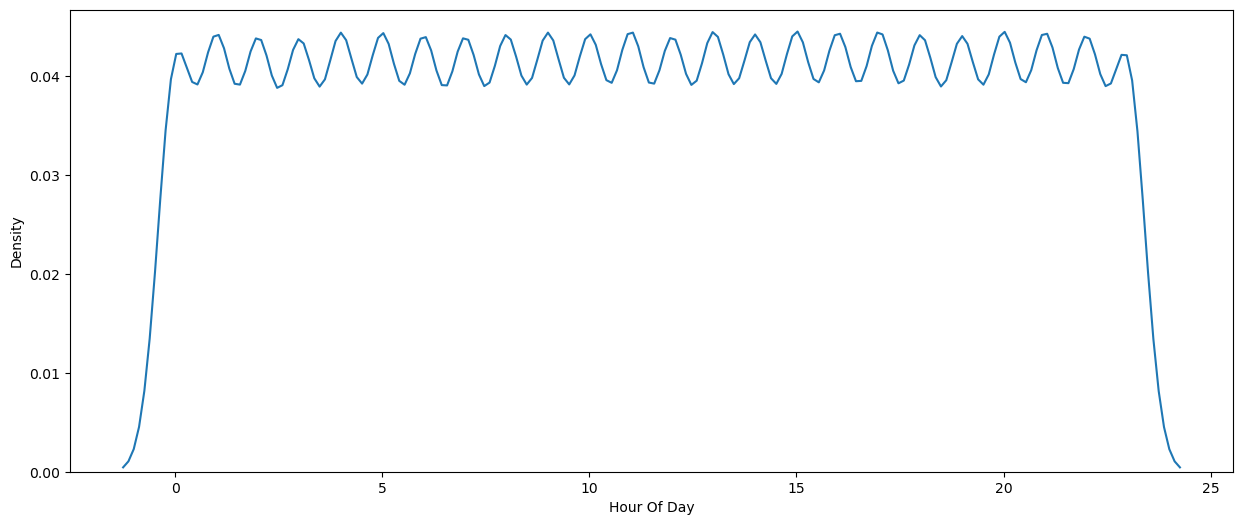

Skewness of Speed is 0.24339828926408028


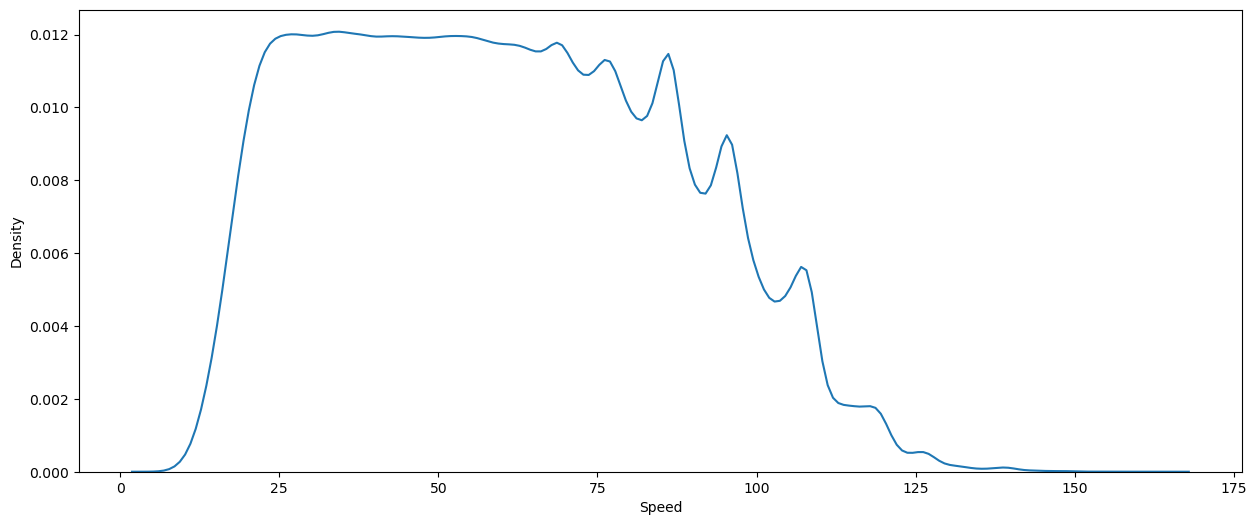

Skewness of Is Peak Hour is 1.9097587908890912


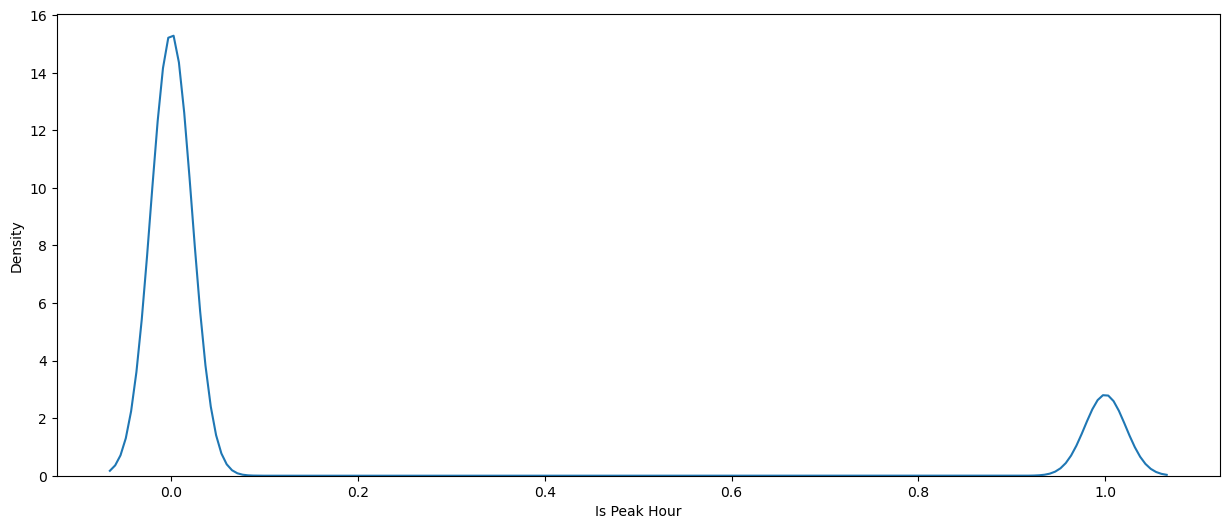

Skewness of Random Event Occurred is 4.134936436937457


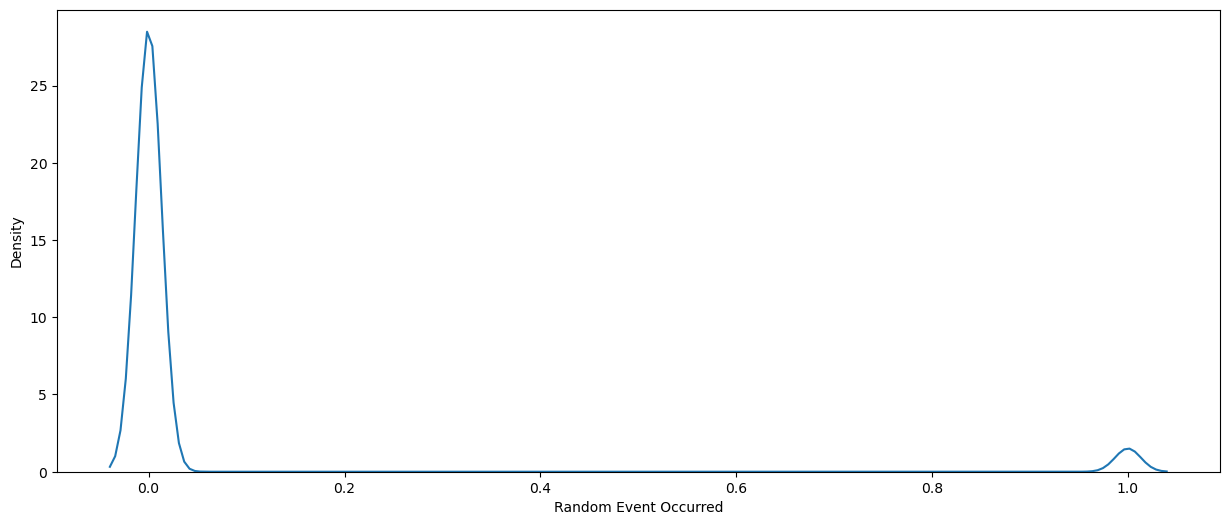

Skewness of Energy Consumption is 0.6967291974435518


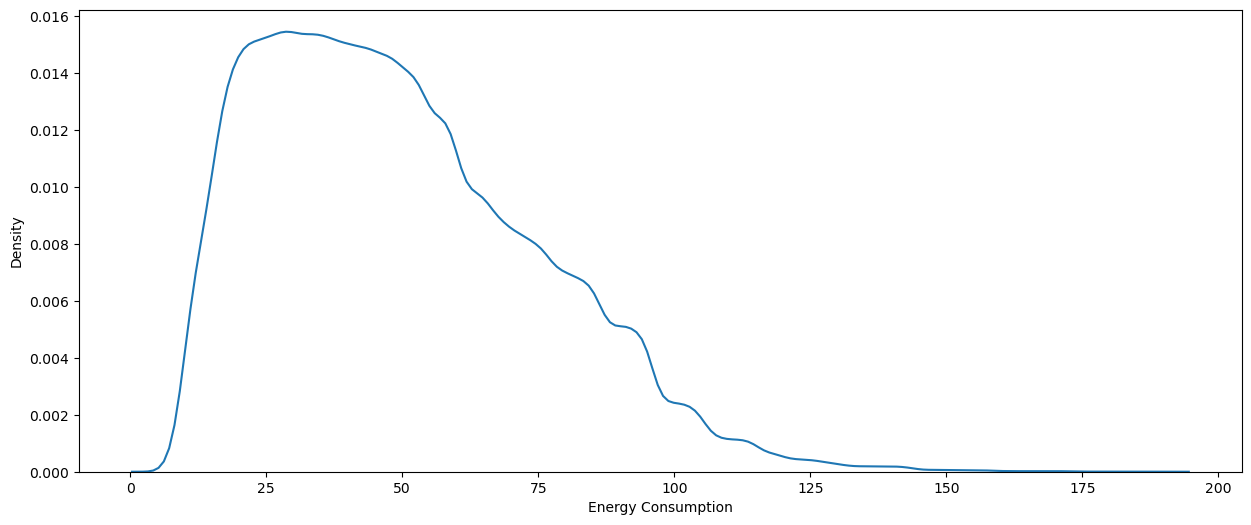

Skewness of Traffic Density is 1.412715319178801


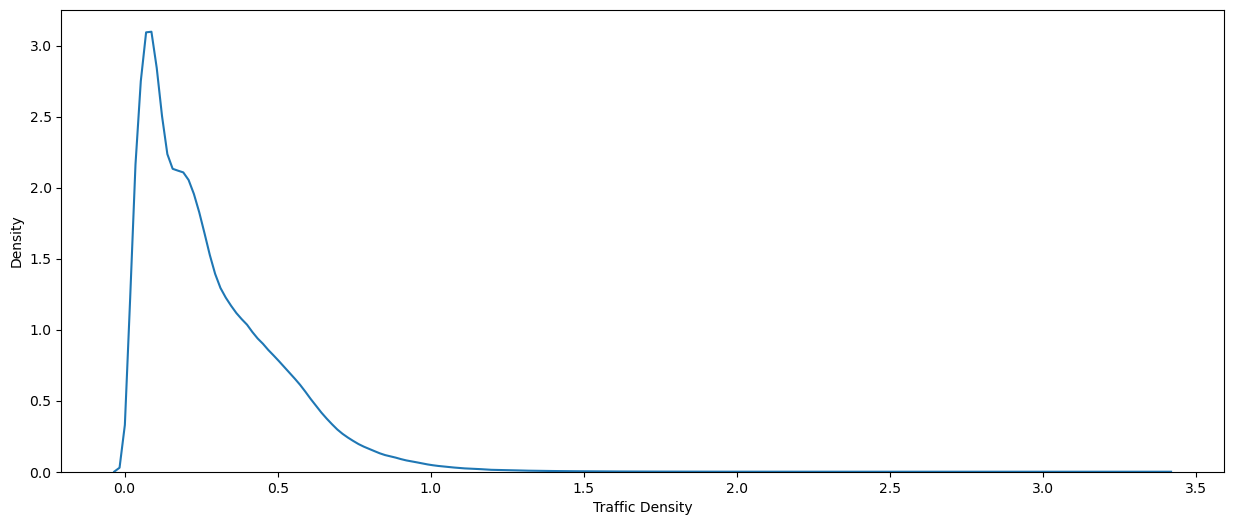

In [30]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(15,6))
    print(f'Skewness of {i} is {df[i].skew()}')
    sns.kdeplot(df[i])
    plt.show()

1.412715319178801
0.23060233708439132


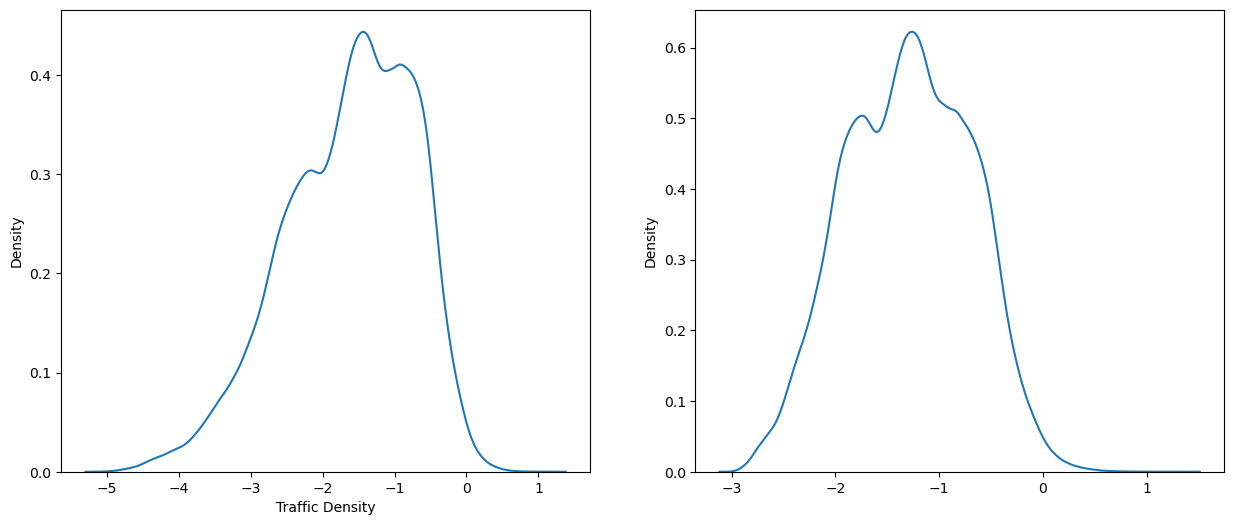

In [31]:
# BoxCox transformation

from scipy.stats import boxcox

transformed_data, lmd = boxcox(df['Traffic Density'])

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.kdeplot(np.log(df['Traffic Density']))
print(df['Traffic Density'].skew())

plt.subplot(1, 2, 2)
sns.kdeplot(transformed_data)
print(lmd)

In [33]:
df.columns

Index(['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week',
       'Hour Of Day', 'Speed', 'Is Peak Hour', 'Random Event Occurred',
       'Energy Consumption', 'Traffic Density'],
      dtype='object')

Converting object columns into numric columns by getting dummies

In [35]:
df = pd.get_dummies(df, columns=['City', 'Vehicle Type', 'Weather', 'Economic Condition', 'Day Of Week'], drop_first=True)

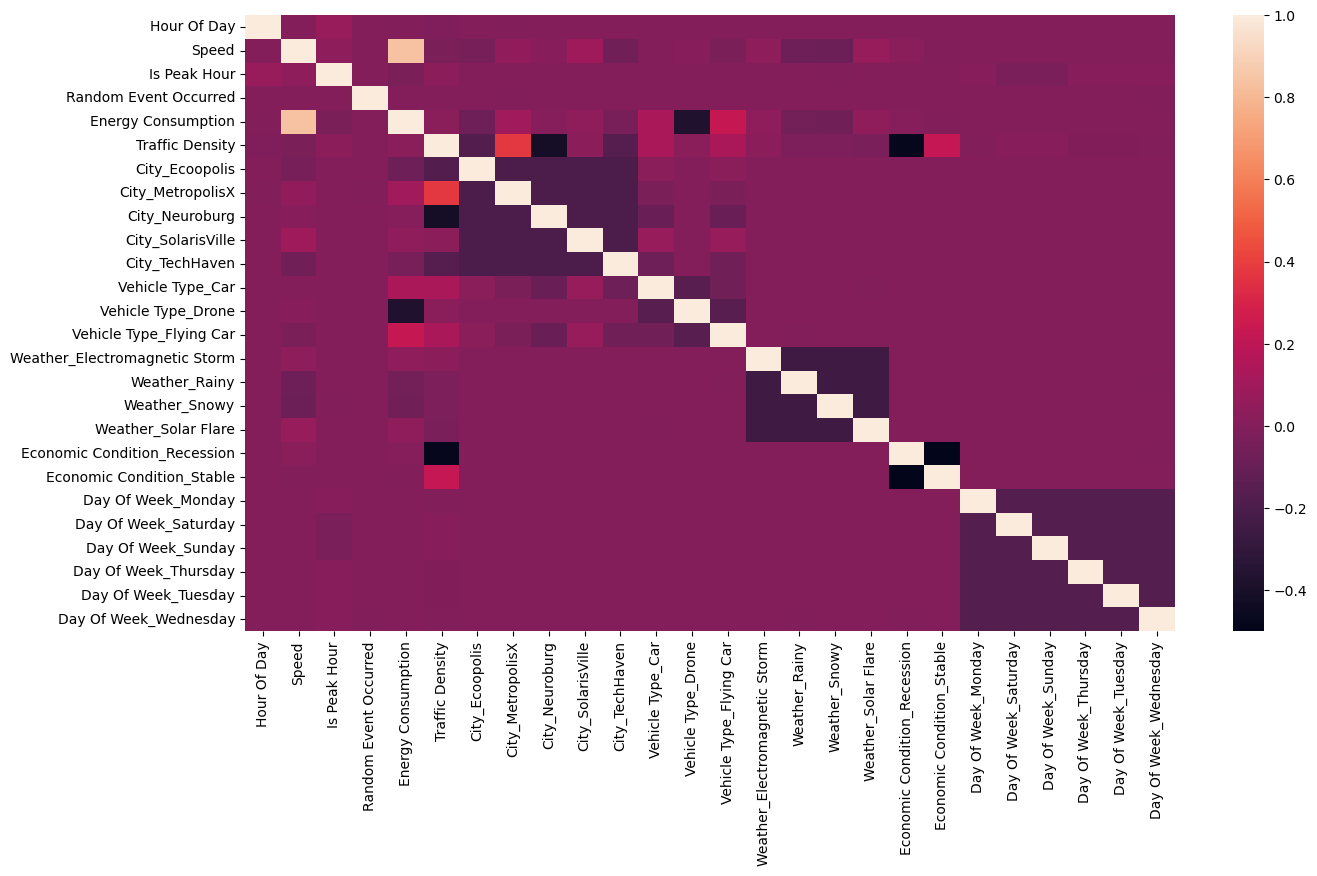

In [37]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr())
plt.show()

Checking if numrical columns have outliers

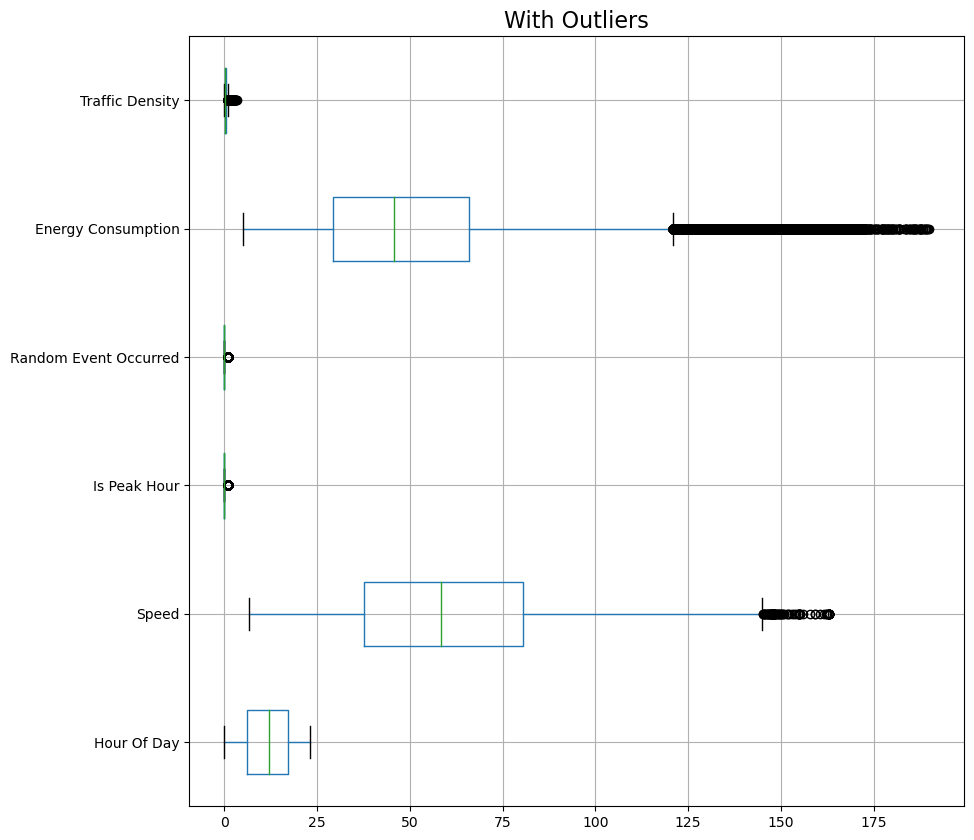

In [39]:
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

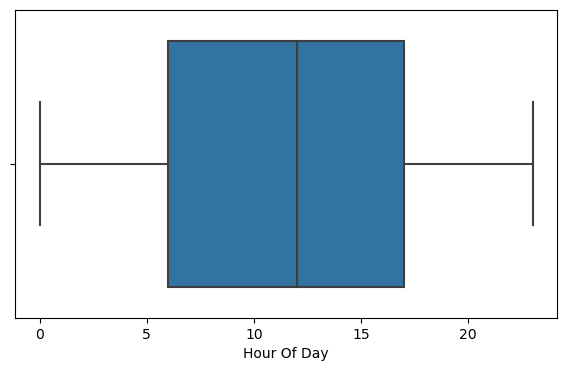

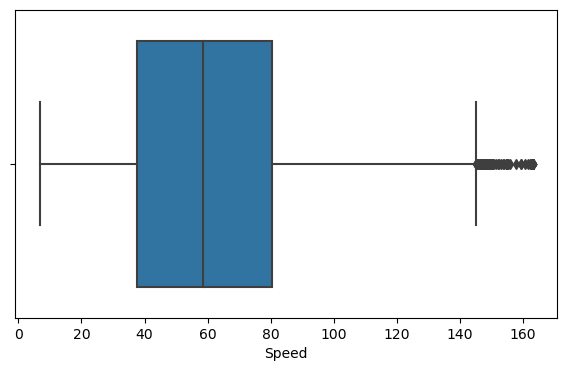

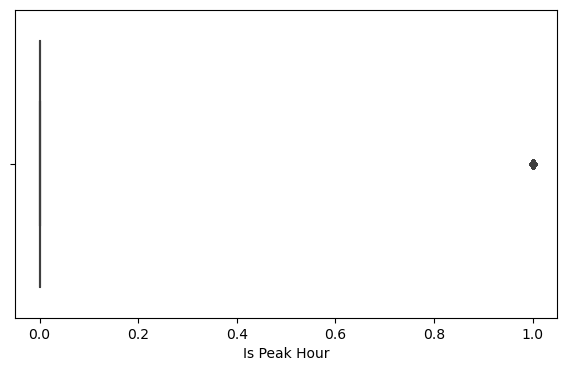

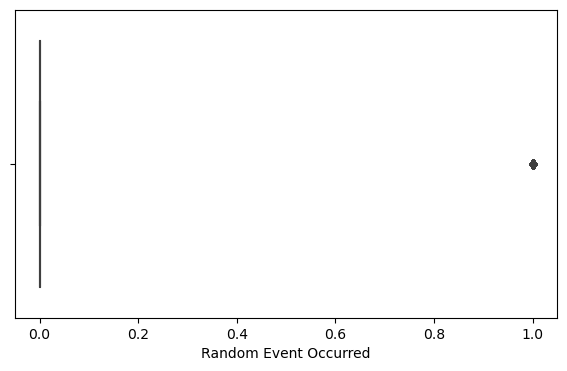

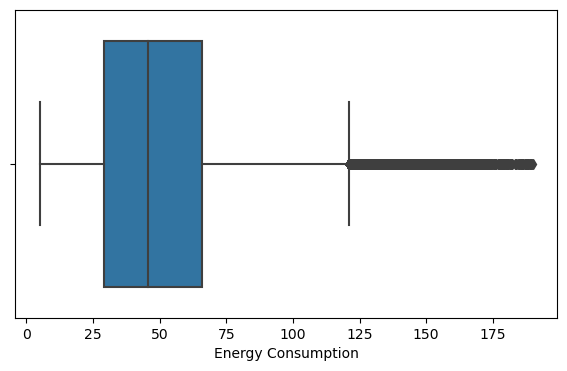

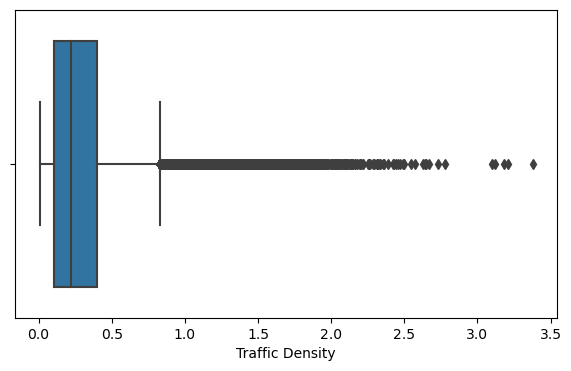

In [41]:
for i in df.select_dtypes(include='number').columns:
    plt.figure(figsize=(7,4))
    sns.boxplot(x = df[i])
    plt.show()

So, to stablize the data we will remove the outliers

In [43]:
def outliers(col):
    q1, q3 = np.percentile(col, [25, 75])
    iqr = q3 - q1
    
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    
    return lw,uw

In [45]:
for i in ['Speed', 'Is Peak Hour', 'Random Event Occurred','Energy Consumption', 'Traffic Density']:
    
    lw, uw = outliers(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])

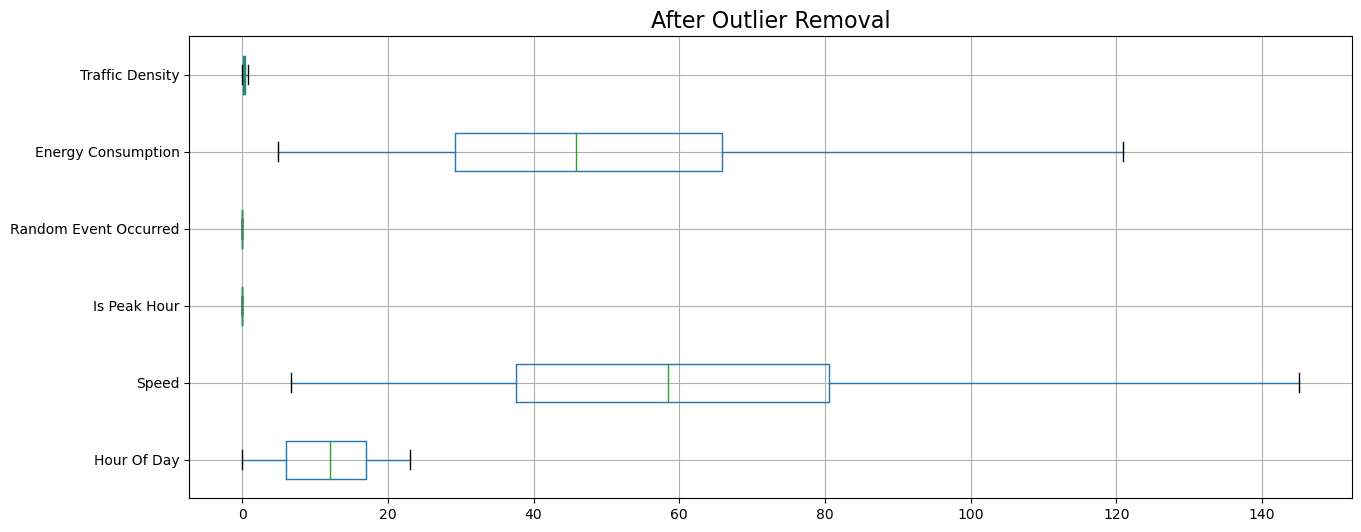

In [47]:
plt.figure(figsize=(15,6))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

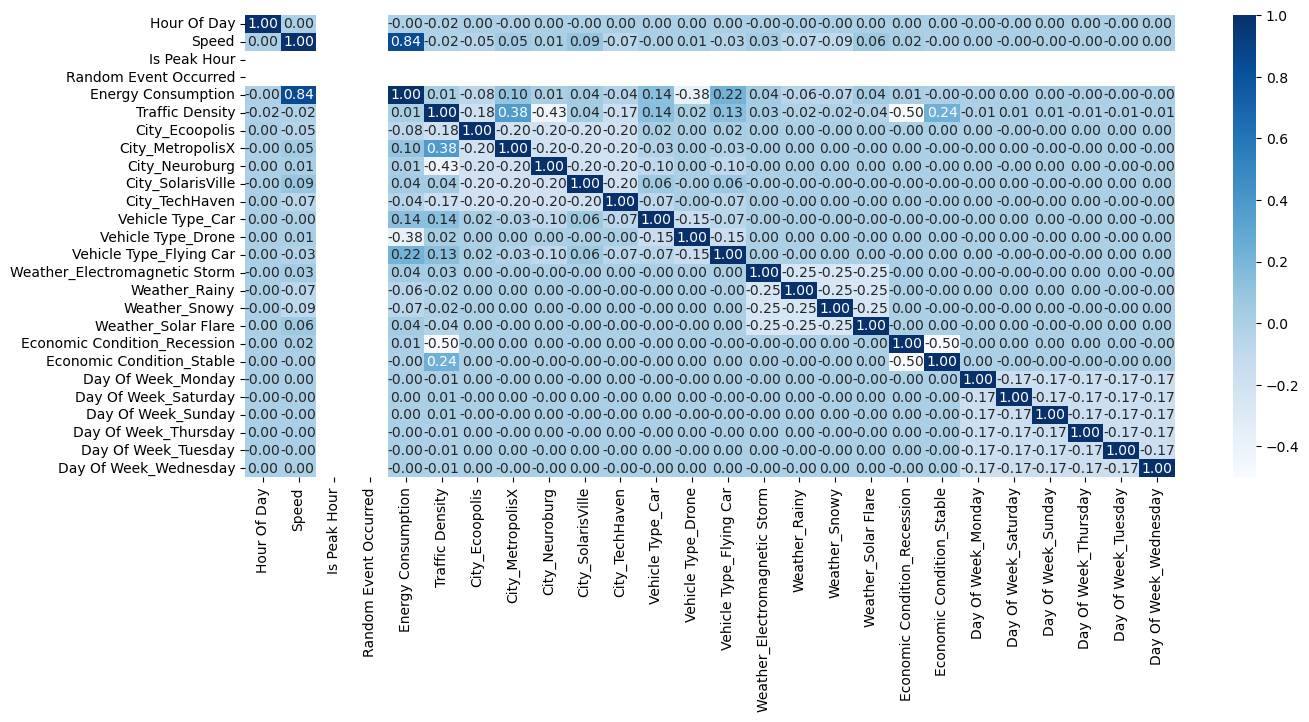

In [49]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True,fmt='.2f',cmap='Blues', )
plt.show()

So, this is a correlation matrix where we can see the highly correlated varibles are Energy consumption and speed.

In [51]:
df.drop(['Is Peak Hour','Random Event Occurred'], axis=1, inplace=True)

We can drop this two columns "Is peak hour || Random event occurred" because its mean and median are 0 and are not participating the model

In [ ]:
#Bivariate Scatterplot of Prices with all the features

for i in df.iloc[:, 0:12].columns:
    plt.figure(figsize = (15,6))
    sns.scatterplot(x = df[i], y = df['Traffic Density'])
    plt.show()  

<!-- # Split the dataset -->

In [55]:
df.head(5)

,Hour Of Day,Speed,Energy Consumption,Traffic Density,City_Ecoopolis,City_MetropolisX,City_Neuroburg,City_SolarisVille,City_TechHaven,Vehicle Type_Car,...,Weather_Snowy,Weather_Solar Flare,Economic Condition_Recession,Economic Condition_Stable,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday
0,20,29.4268,14.713400,0.5241,False,False,False,True,False,False,...,True,False,False,True,False,False,True,False,False,False
1,2,118.8000,120.852825,0.3208,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,True
2,16,100.3904,91.264000,0.0415,False,False,True,False,False,False,...,False,True,True,False,False,False,False,False,False,True
3,8,76.8000,46.075300,0.1811,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,16,45.2176,40.193400,0.4544,False,False,False,False,False,False,...,False,True,False,True,False,True,False,False,False,False


Splitting of the data 

In [57]:
X = df.drop(columns={'Traffic Density'})
Y = np.log(df['Traffic Density'])

In [59]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [61]:
#splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30 , random_state=1)


In [63]:
#intialise the model to be fit and fir the model on the train data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [65]:
print('The coefficient of determination R^2 of the prediction on Train set', regression_model.score(X_train, y_train))

The coefficient of determination R^2 of the prediction on Train set 0.8060920333404912


In [66]:
print('The coefficient of determination R^2 of the prediction on Test set', regression_model.score(X_test, y_test))

The coefficient of determination R^2 of the prediction on Test set 0.8063414045264697


In [69]:
np.sqrt(mean_squared_error(y_test,regression_model.predict(X_test)))

0.3920965445475994

In [71]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(y_test,regression_model.predict(X_test))

0.2883797199479512

In [73]:
import statsmodels.formula.api as smf
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,Hour Of Day,Speed,Energy Consumption,City_Ecoopolis,City_MetropolisX,City_Neuroburg,City_SolarisVille,City_TechHaven,Vehicle Type_Car,Vehicle Type_Drone,...,Weather_Solar Flare,Economic Condition_Recession,Economic Condition_Stable,Day Of Week_Monday,Day Of Week_Saturday,Day Of Week_Sunday,Day Of Week_Thursday,Day Of Week_Tuesday,Day Of Week_Wednesday,Traffic Density
942921,13,88.9524,71.1620,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,True,False,-0.975245
875762,2,46.0635,36.8508,True,False,False,False,False,False,False,...,False,True,False,False,False,True,False,False,False,-3.053361
332752,18,48.8306,44.3915,False,False,True,False,False,False,False,...,True,True,False,False,True,False,False,False,False,-3.717279
461166,18,90.2020,76.7268,False,True,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,-0.456811
297966,23,69.6244,41.6414,False,False,False,False,True,False,True,...,False,True,False,False,False,False,True,False,False,-2.492536


In [77]:
data_train.columns

Index(['Hour Of Day', 'Speed', 'Energy Consumption', 'City_Ecoopolis',
       'City_MetropolisX', 'City_Neuroburg', 'City_SolarisVille',
       'City_TechHaven', 'Vehicle Type_Car', 'Vehicle Type_Drone',
       'Vehicle Type_Flying Car', 'Weather_Electromagnetic Storm',
       'Weather_Rainy', 'Weather_Snowy', 'Weather_Solar Flare',
       'Economic Condition_Recession', 'Economic Condition_Stable',
       'Day Of Week_Monday', 'Day Of Week_Saturday', 'Day Of Week_Sunday',
       'Day Of Week_Thursday', 'Day Of Week_Tuesday', 'Day Of Week_Wednesday',
       'Traffic Density'],
      dtype='object')

In [79]:
data_train.rename(columns = {'Hour Of Day':'hour_of_day','Energy Consumption':'energy_consumption','Vehicle Type_Car':'vehicle_type_car','Vehicle Type_Drone':'vehicle_type_drone',
       'Vehicle Type_Flying Car':'vehicle_type_flying_car', 'Weather_Electromagnetic Storm':'weather_electromagnetic_strom',
       'Weather_Solar Flare':'weather_solar_flare',
       'Economic Condition_Recession':'economic_condition_recession', 'Economic Condition_Stable':'economic_condition_stable',
       'Day Of Week_Monday':'monday', 'Day Of Week_Saturday':'saturday', 'Day Of Week_Sunday':'sunday',
       'Day Of Week_Thursday':'thursday', 'Day Of Week_Tuesday':'tuesday', 'Day Of Week_Wednesday':'wednwsday',
       'Traffic Density':'traffic_density'}, inplace=True)

In [81]:
data_test.rename(columns = {'Hour Of Day':'hour_of_day','Energy Consumption':'energy_consumption','Vehicle Type_Car':'vehicle_type_car','Vehicle Type_Drone':'vehicle_type_drone',
       'Vehicle Type_Flying Car':'vehicle_type_flying_car', 'Weather_Electromagnetic Storm':'weather_electromagnetic_strom',
       'Weather_Solar Flare':'weather_solar_flare',
       'Economic Condition_Recession':'economic_condition_recession', 'Economic Condition_Stable':'economic_condition_stable',
       'Day Of Week_Monday':'monday', 'Day Of Week_Saturday':'saturday', 'Day Of Week_Sunday':'sunday',
       'Day Of Week_Thursday':'thursday', 'Day Of Week_Tuesday':'tuesday', 'Day Of Week_Wednesday':'wednwsday',
       'Traffic Density':'traffic_density'}, inplace=True)

In [83]:
data_train.columns

Index(['hour_of_day', 'Speed', 'energy_consumption', 'City_Ecoopolis',
       'City_MetropolisX', 'City_Neuroburg', 'City_SolarisVille',
       'City_TechHaven', 'vehicle_type_car', 'vehicle_type_drone',
       'vehicle_type_flying_car', 'weather_electromagnetic_strom',
       'Weather_Rainy', 'Weather_Snowy', 'weather_solar_flare',
       'economic_condition_recession', 'economic_condition_stable', 'monday',
       'saturday', 'sunday', 'thursday', 'tuesday', 'wednwsday',
       'traffic_density'],
      dtype='object')

In [85]:
expr = 'traffic_density ~ hour_of_day + Speed + energy_consumption + City_Ecoopolis + City_MetropolisX + City_Neuroburg + City_SolarisVille + City_TechHaven + vehicle_type_car + vehicle_type_drone + vehicle_type_flying_car + weather_electromagnetic_strom + Weather_Rainy + Weather_Snowy + weather_solar_flare + economic_condition_recession + economic_condition_stable + monday + saturday + sunday + thursday + tuesday + wednwsday'

In [87]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= expr, data = data_train).fit()
lm1.params

Intercept                               -0.482561
City_Ecoopolis[T.True]                  -0.826025
City_MetropolisX[T.True]                 0.073776
City_Neuroburg[T.True]                  -1.725348
City_SolarisVille[T.True]               -0.450880
City_TechHaven[T.True]                  -0.775752
vehicle_type_car[T.True]                 0.271200
vehicle_type_drone[T.True]               0.018190
vehicle_type_flying_car[T.True]          0.294680
weather_electromagnetic_strom[T.True]   -0.041212
Weather_Rainy[T.True]                   -0.107625
Weather_Snowy[T.True]                   -0.108332
weather_solar_flare[T.True]             -0.143324
economic_condition_recession[T.True]    -1.077764
economic_condition_stable[T.True]       -0.030004
monday[T.True]                          -0.016587
saturday[T.True]                         0.001782
sunday[T.True]                           0.003581
thursday[T.True]                        -0.020462
tuesday[T.True]                         -0.020819


In [88]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:        traffic_density   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 1.543e+05
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:52:48   Log-Likelihood:            -4.1361e+05
No. Observations:              853696   AIC:                         8.273e+05
Df Residuals:                  853672   BIC:                         8.276e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

As we can see here the pvalue of saturday[T.True] 0.263 jwhich is greater than 0.05. Therefore we have to remove it.

In [97]:
expr1 = 'traffic_density ~ hour_of_day + Speed + energy_consumption + City_Ecoopolis + City_MetropolisX + City_Neuroburg + City_SolarisVille + City_TechHaven + vehicle_type_car + vehicle_type_drone + vehicle_type_flying_car + weather_electromagnetic_strom + Weather_Rainy + Weather_Snowy + weather_solar_flare + economic_condition_recession + economic_condition_stable + monday + thursday + tuesday + wednwsday'

In [99]:
lm2 = smf.ols(formula= expr1, data = data_train).fit()

In [100]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        traffic_density   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                 1.690e+05
Date:                Sun, 13 Apr 2025   Prob (F-statistic):               0.00
Time:                        21:55:31   Log-Likelihood:            -4.1361e+05
No. Observations:              853696   AIC:                         8.273e+05
Df Residuals:                  853674   BIC:                         8.275e+05
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------